1\. PCA on 3D dataset

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

In [1]:
import numpy as np
from scipy import linalg as la
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
#Function that generates the 3 dataset
def generate_dataset(n):
    a = np.random.normal(0, 1, n)
    b = a + np.random.normal(0, 3, n)
    c = 2*a + b
    return a,b,c

#GENERATE DATASET

n= 1000
x1, x2, x3 = generate_dataset(n)
x = np.array([x1, x2, x3])

In [3]:
#EIGENVALUES AND EIGENVECTORS --> EIGENDECOMPOSITION OF COVARIANCE MATRIX
print('EIGENDECOMPOSITION OF COVARIANCE MATRIX:')
cov_matrix = np.cov(x)
print('Covariance matrix of dataset:\n', cov_matrix, '\n')

evalues, evectors = la. eig(cov_matrix)
i = np.argsort(evalues)[::-1]
evalues = evalues[i]
evectors = evectors[:,i]
print('\nEigenvalues:\n', evalues,)
print('\nReal part of eigenvalues:\n', np.real(evalues))
print('\nEigenvectors:\n', evectors, '\n\n')

#EIGENVECTORS AND EIGENVALUES --> SVD
U, S, Vt = la.svd(x)
print('SVD\n')
print('Spectrum:\n', S,'\n')
evectors_svd = U
evalues_svd = (S**2)/(n-1)
print('Eigenvalues:\n', evalues_svd, '\n')
print('Eigenvectors:\n', evectors_svd, '\n')

precision = 1.e-02
check_res = np.allclose(evalues, evalues_svd, precision)
if check_res:
    print('The two methods bring to the same results.\n')
else:
    print('The two methods bring to different results.\n')

EIGENDECOMPOSITION OF COVARIANCE MATRIX:
Covariance matrix of dataset:
 [[ 0.97714583  1.13265941  3.08695107]
 [ 1.13265941 10.65354454 12.91886335]
 [ 3.08695107 12.91886335 19.0927655 ]] 


Eigenvalues:
 [ 2.88235179e+01+0.j  1.89993796e+00+0.j -1.13681243e-15+0.j]

Real part of eigenvalues:
 [ 2.88235179e+01  1.89993796e+00 -1.13681243e-15]

Eigenvectors:
 [[-0.11300756  0.5661825  -0.81649658]
 [-0.58042156 -0.70458793 -0.40824829]
 [-0.80643667  0.42777708  0.40824829]] 


SVD

Spectrum:
 [1.69805180e+02 4.35786616e+01 2.17560815e-14] 

Eigenvalues:
 [2.88626619e+01 1.90100075e+00 4.73800884e-31] 

Eigenvectors:
 [[-0.1131431   0.56615543 -0.81649658]
 [-0.58025287 -0.70472686 -0.40824829]
 [-0.80653906  0.42758401  0.40824829]] 

The two methods bring to the same results.



In [4]:
#WHAT PERCENTAGE OF DATASET'S VARIABILITYIS EXPLEINEDBY THE PRINCIPAL COMPONENTS ?

Lambda = np.diag(np.real(evalues))
print('Lambda:\n', Lambda, '\n')

print('k=1:')
print('PCA = {:.4}% of total variability is retained'.format(abs(Lambda[0,0]) /Lambda.trace()*100))
print('PCA = {:.4}% of total variability is retained'.format(abs(Lambda[1,1]) /Lambda.trace()*100))
print('PCA = {:.4}% of total variability is retained'.format(abs(Lambda[2,2]) /Lambda.trace()*100))
print('k=2:')
print('PCA = {:.4}% of total variability is retained'.format(abs(Lambda[0,0] + Lambda[1,1])/Lambda.trace()*100))
print('PCA = {:.4}% of total variability is retained'.format(abs(Lambda[0,0] + Lambda[2,2])/Lambda.trace()*100))
print('PCA = {:.4}% of total variability is retained'.format(abs(Lambda[1,1] + Lambda[2,2])/Lambda.trace()*100))


Lambda:
 [[ 2.88235179e+01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.89993796e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.13681243e-15]] 

k=1:
PCA = 93.82% of total variability is retained
PCA = 6.184% of total variability is retained
PCA = 3.7e-15% of total variability is retained
k=2:
PCA = 100.0% of total variability is retained
PCA = 93.82% of total variability is retained
PCA = 6.184% of total variability is retained


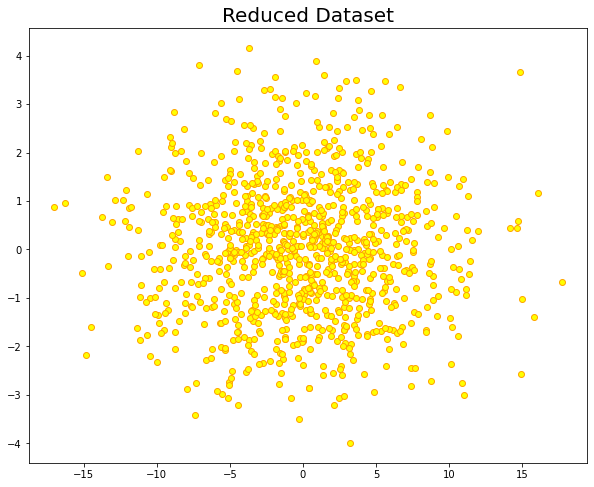

In [5]:
#Redefine the data according to the new basis from the PCA
#REDEFINE THE DATA ACCORDING TO THE NEW BASIS FROM THE PCA
x2 = np.dot(evectors.T, x)
reduced = x2[:-1,:]

fig, ax = plt.subplots(figsize = (10,8))
ax.scatter(reduced[0], reduced[1], marker = 'o', color = 'yellow', edgecolor = 'orange')
ax.set_title('Reduced Dataset', fontsize = 20)
plt.show()

(-8.0, 8.0)

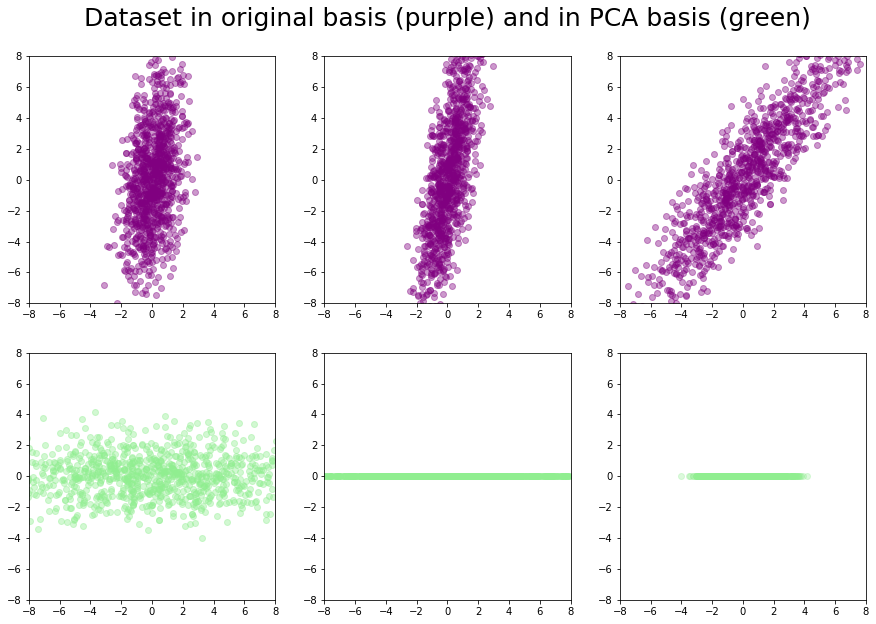

In [6]:
#Plot the data, in both the original and the new basis. 
#The figure should have 2 rows (the original and the new basis) and 
#3 columns (the  [𝑥0,𝑥1] ,  [𝑥0,𝑥2]  and  [𝑥1,𝑥2]  projections) of scatter plots

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows = 2, ncols = 3, figsize = (15,10))

ax1.scatter(x[0,:], x[1,:], alpha = 0.4, color = 'purple', label = (0,1))
ax1.set_xlim(-8,8)
ax1.set_ylim(-8,8)
#set the title here to have it centered
ax2.set_title('Dataset in original basis (purple) and in PCA basis (green)',pad = 30, fontsize = 25)
ax2.scatter(x[0, :], x[2, :], alpha=0.4, color = 'purple', label = '(0,2)')
ax2.set_xlim(-8,8)
ax2.set_ylim(-8,8)

ax3.scatter(x[1, :], x[2, :], alpha=0.4, color = 'purple',label = '(1,2)')
ax3.set_xlim(-8,8)
ax3.set_ylim(-8,8)

ax4.scatter(x2[0, :], x2[1, :], alpha=0.4, color = 'lightgreen', label = '(0,1)')
ax4.set_xlim(-8,8)
ax4.set_ylim(-8,8)

ax5.scatter(x2[0, :], x2[2, :], alpha=0.3, color = 'lightgreen', label = '(0,2)')
ax5.set_xlim(-8,8)
ax5.set_ylim(-8,8)

ax6.scatter(x2[1, :], x2[2, :], alpha=0.3, color = 'lightgreen', label = '(1,2)')
ax6.set_xlim(-8,8)
ax6.set_ylim(-8,8)

2\. PCA on a nD dataset

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

In [7]:
noise = []
for i in range(10):
    noise.append(np.random.normal(0, 1/40, n))

# add noise to initial dataset 
M = np.concatenate((x, np.array(noise)))

cov_M = np.cov(M)
l, V = la.eig(cov_M)
Lambda = np.diag(np.real_if_close(l))
print(np.real_if_close(l)/np.trace(Lambda))

print ('\nPCA w k=2 (0,1):',abs(Lambda[0,0]+Lambda[1,1])/Lambda.trace()*100,'% of the total variability is retained')
print('\nThe two principal variables are the same as before, hence the variability associated to the noise variables is negligible.')

[9.37969097e-01 6.18276455e-02 3.01731482e-17 2.40430405e-05
 2.30247611e-05 2.24964887e-05 1.70339540e-05 2.12902582e-05
 1.76778376e-05 1.82043362e-05 2.04244329e-05 1.92543782e-05
 1.98080202e-05]

PCA w k=2 (0,1): 99.97967424924839 % of the total variability is retained

The two principal variables are the same as before, hence the variability associated to the noise variables is negligible.
